# Import Module

In [1]:
import pickle
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
dates = range(19,30)

In [2]:
with open('./filtered_daily/df_topic_sent_tweets_filtered_subset_1_12hrs.pickle', 'rb') as handle:
    df_topic_sent = pickle.load(handle)
with open('./filtered_daily/df_topic_sent_news_filtered_subset_1_12hrs.pickle', 'rb') as handle:
    df_topic_sent_news = pickle.load(handle)

In [7]:
timespan = df_topic_sent.startTime.unique()
timespan

array(['2020-0319 00:00:00', '2020-0319 12:00:00', '2020-0320 00:00:00',
       '2020-0320 12:00:00', '2020-0321 00:00:00', '2020-0321 12:00:00',
       '2020-0322 00:00:00', '2020-0322 12:00:00', '2020-0323 00:00:00',
       '2020-0323 12:00:00', '2020-0324 00:00:00', '2020-0324 12:00:00',
       '2020-0325 00:00:00', '2020-0325 12:00:00', '2020-0326 00:00:00',
       '2020-0326 12:00:00', '2020-0327 00:00:00', '2020-0327 12:00:00',
       '2020-0328 00:00:00', '2020-0328 12:00:00', '2020-0329 00:00:00',
       '2020-0329 12:00:00'], dtype=object)

In [8]:
df_topic_sent_news.timeSpan.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

In [9]:
times = range(22)

In [ ]:
df_topic_sent.iloc[100:120,:]

# Overall Visulization

In [10]:
df_topic_sent.loc[:,[0,1,2]].sum().sum(),df_topic_sent_news.loc[:,[0,1,2]].sum().sum()

(1606557, 1190906)

(0.0, 1300000.0)

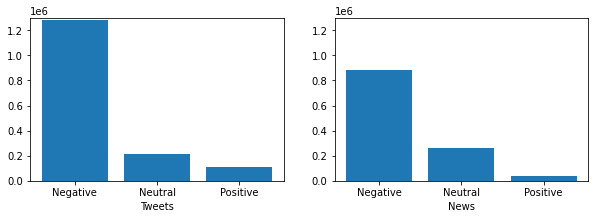

In [11]:
plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.bar(('Negative','Neutral','Positive'),df_topic_sent.loc[:,[0,1,2]].sum())
plt.xlabel('Tweets')
plt.ylim(0,1300000)
plt.subplot(122)
plt.bar(('Negative','Neutral','Positive'),df_topic_sent_news.loc[:,[0,1,2]].sum())
plt.xlabel('News')
plt.ylim(0,1300000)

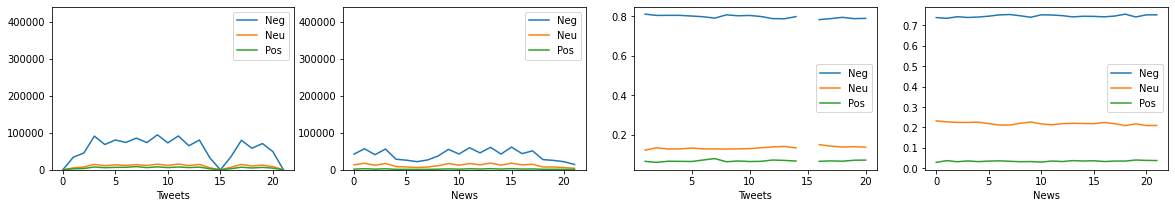

In [60]:
plt.figure(figsize=(20, 3))
plt.subplot(141)
plt.plot(df_topic_sent.groupby('timeSpan').sum().loc[:,[0,1,2]])
plt.ylim(0,440000)
plt.xlabel('Tweets')
plt.legend(['Neg','Neu','Pos'])
plt.subplot(142)
plt.plot(df_topic_sent_news.groupby('timeSpan').sum().loc[:,[0,1,2]])
plt.ylim(0,440000)
plt.xlabel('News')
plt.legend(['Neg','Neu','Pos'])
plt.subplot(143)
day = df_topic_sent.groupby('timeSpan').sum()
plt.plot(day[0]/day['total'])
plt.plot(day[1]/day['total'])
plt.plot(day[2]/day['total'])
plt.xlabel('Tweets')
plt.legend(['Neg','Neu','Pos'])
plt.subplot(144)
day = df_topic_sent_news.groupby('timeSpan').sum()
plt.plot(day[0]/day['total'])
plt.plot(day[1]/day['total'])
plt.plot(day[2]/day['total'])
plt.xlabel('News')
plt.legend(['Neg','Neu','Pos'])

In [61]:
for df in [df_topic_sent,df_topic_sent_news]:
    t = df.loc[:,[0,1,2]].sum()
    print((t[2]-t[0])/(t.sum()))

-0.7280183647390039
-0.7097797811078288


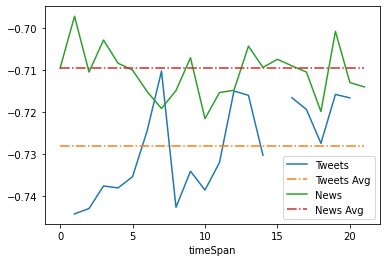

In [67]:
# Overall all sentiment score against each day
tweets_sent = df_topic_sent.groupby('timeSpan').sum()
((tweets_sent[2]-tweets_sent[0])/tweets_sent['total']).plot()
plt.plot(times,[-0.7280192367664753 for d in times], linestyle="-." )
news_sent = df_topic_sent_news.groupby('timeSpan').sum()
((news_sent[2]-news_sent[0])/news_sent['total']).plot()
plt.plot(times,[-0.7095476186239695 for d in times], linestyle="-." )
plt.legend(['Tweets','Tweets Avg','News','News Avg'])

# Topic Count of each Sentiment

Text(0.5, 0, 'News')

<Figure size 720x216 with 0 Axes>

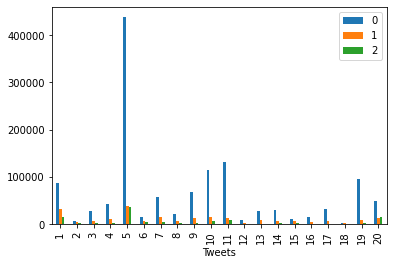

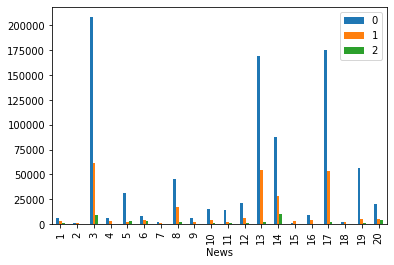

In [68]:
#由于存在无法map topics 和 sent的，所以现在tweets和new数量不一致
plt.figure(figsize=(10, 3))
df_topic_sent.groupby('TopicID').sum().loc[:,[0,1,2]].plot.bar()
plt.xlabel('Tweets')
df_topic_sent_news.groupby('TopicID').sum().loc[:,[0,1,2]].plot.bar()
plt.xlabel('News')

In [74]:
def multi_subplot(w=15,h=12,d='bar',dfs=df_topic_sent):
    plt.figure(1,figsize=(w, h))
    for i in range(3):
        plt.subplot(int(f'14{i+1}'))
        count = dfs.groupby('TopicID')[i].sum()
        if d=='bar':
            count.plot.bar()
        elif d=='pie':
            count.sort_index().plot.pie()
    #     plt.legend(loc='best', shadow=True)
        plt.title('Topics Count when sentiment is '+ str(i))
    plt.subplot(144)
    topic_total = dfs.groupby('TopicID').sum()
    ((topic_total[2]-topic_total[0])/topic_total['total']).plot.bar()
#     dfs.groupby('TopicID')['TopicScore'].sum().plot.bar()
    plt.title('Topics Sentiment Scores')

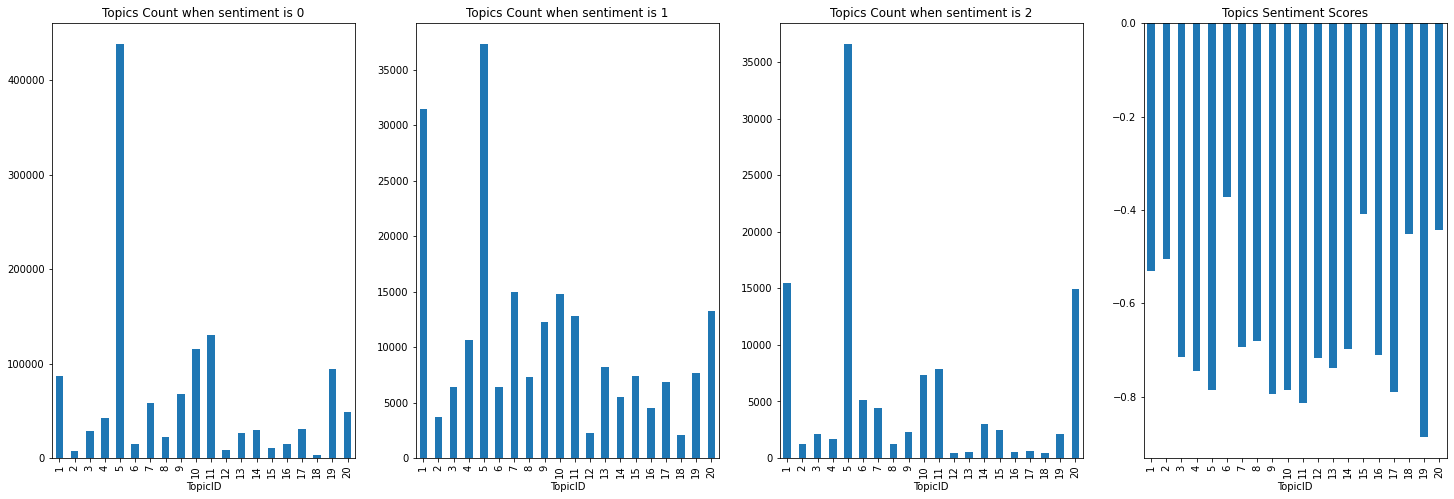

In [75]:
multi_subplot(w=25,h=8,dfs=df_topic_sent)

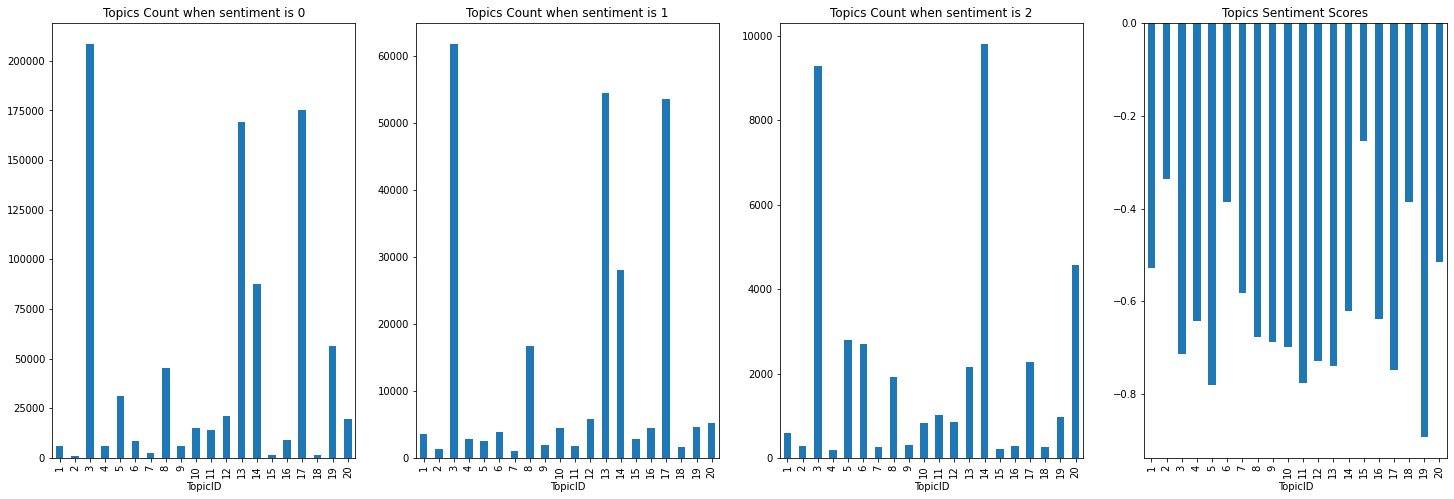

In [76]:
multi_subplot(w=25,h=8,dfs=df_topic_sent_news)

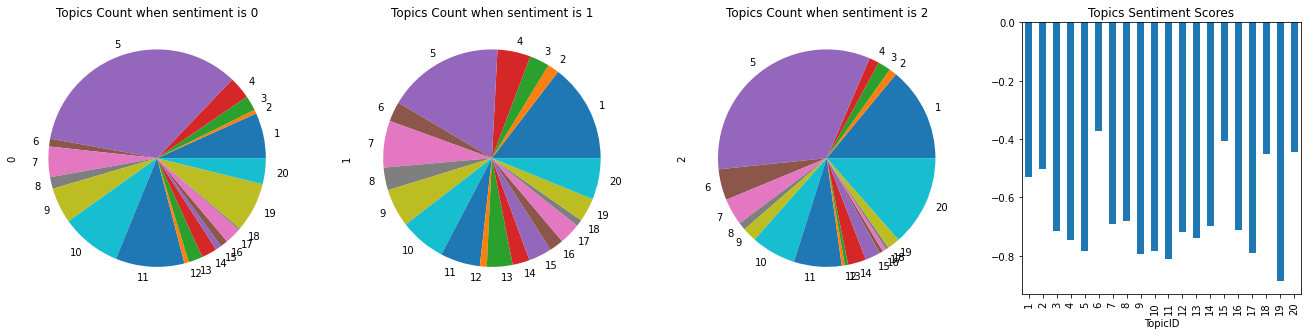

In [77]:
multi_subplot(w=23,h=5,d='pie')

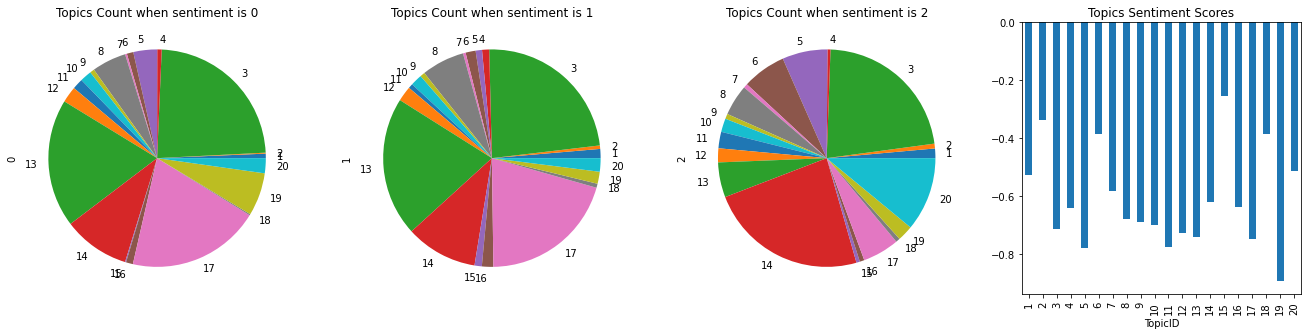

In [78]:
multi_subplot(w=23,h=5,d='pie',dfs=df_topic_sent_news)

# Data Reduction & Relative Value

In [79]:
df_topic_sent.iloc[200:203] # Flat table

TopicID     0    1    2  timeSpan           startTime  total  TopicScore
200       12   463  113   30        10  2020-0324 00:00:00    606   -0.714521
201       13  1597  424   31        10  2020-0324 00:00:00   2052   -0.763158
202       14  1348  257  149        10  2020-0324 00:00:00   1754   -0.683580

In [80]:
pd.DataFrame(dict(df_topic_sent.groupby('TopicID').apply(lambda x: list(pd.concat([x[0],x[1],x[2]],axis=1).values))),index=timespan)

1                2                 3   \
2020-0319 00:00:00           [0, 0, 0]        [0, 0, 0]         [0, 0, 0]   
2020-0319 12:00:00     [733, 308, 153]    [116, 63, 98]    [902, 184, 80]   
2020-0320 00:00:00   [2829, 1016, 444]   [196, 192, 44]   [1273, 249, 76]   
2020-0320 12:00:00   [3691, 1473, 681]   [386, 292, 63]  [2462, 477, 209]   
2020-0321 00:00:00   [4646, 1711, 718]   [290, 169, 33]  [1513, 327, 117]   
2020-0321 12:00:00   [4741, 1977, 691]   [302, 185, 50]  [1736, 371, 143]   
2020-0322 00:00:00  [8173, 2494, 1589]   [456, 195, 68]  [1324, 290, 111]   
2020-0322 12:00:00  [8941, 2611, 1889]  [607, 244, 100]  [1574, 361, 127]   
2020-0323 00:00:00  [5724, 1909, 1004]   [472, 191, 54]  [1571, 344, 101]   
2020-0323 12:00:00  [6656, 1956, 1105]   [490, 248, 59]  [2212, 534, 155]   
2020-0324 00:00:00   [5729, 1839, 880]   [480, 212, 74]  [1680, 353, 102]   
2020-0324 12:00:00  [6545, 2353, 1053]   [453, 215, 56]  [2254, 489, 161]   
2020-0325 00:00:00   [4373, 1654, 904]   [412, 189, 44]   [1473, 299, 81]   
2020-0325 12:00:00   [3583, 1647, 721]   [608, 279, 68]  [2002, 541, 159]   
2020-0326 00:00:00    [1985, 773, 346]    [542, 73, 24]    [631, 141, 33]   
2020-0326 12:00:00           [0, 0, 0]        [0, 0, 0]         [0, 0, 0]   
2020-0327 00:00:00   [2307, 1078, 396]   [198, 151, 35]    [902, 214, 47]   
2020-0327 12:00:00   [3428, 1683, 650]   [529, 282, 71]  [1727, 432, 150]   
2020-0328 00:00:00   [3736, 1369, 590]  [343, 155, 121]   [1128, 273, 75]   
2020-0328 12:00:00  [4805, 2168, 1048]   [322, 163, 56]  [1310, 294, 127]   
2020-0329 00:00:00   [3756, 1478, 645]  [280, 171, 121]    [872, 190, 66]   
2020-0329 12:00:00           [0, 0, 0]        [0, 0, 0]         [0, 0, 0]   

                                  4                    5                 6   \
2020-0319 00:00:00         [0, 0, 0]            [0, 0, 0]         [0, 0, 0]   
2020-0319 12:00:00   [1325, 294, 37]  [15720, 1258, 1217]   [440, 208, 127]   
2020-0320 00:00:00   [1453, 358, 51]  [15306, 1182, 1117]   [471, 259, 158]   
2020-0320 12:00:00   [2873, 674, 91]  [36556, 3087, 3182]  [1135, 481, 341]   
2020-0321 00:00:00   [2138, 497, 84]  [24187, 2001, 2077]   [784, 305, 281]   
2020-0321 12:00:00   [2603, 601, 95]  [30134, 2557, 2565]  [1001, 423, 347]   
2020-0322 00:00:00   [2025, 509, 63]  [22993, 1917, 1886]   [761, 388, 252]   
2020-0322 12:00:00   [2284, 521, 95]  [29745, 2489, 2558]   [892, 412, 362]   
2020-0323 00:00:00   [2316, 505, 91]  [23741, 1919, 1873]   [799, 319, 242]   
2020-0323 12:00:00   [2519, 572, 97]  [33507, 2786, 2659]  [1195, 459, 397]   
2020-0324 00:00:00   [2511, 603, 85]  [22693, 1821, 1730]   [808, 308, 293]   
2020-0324 12:00:00  [3279, 909, 126]  [30497, 2552, 2426]  [1057, 427, 367]   
2020-0325 00:00:00   [2164, 682, 88]  [20975, 1832, 1793]   [799, 320, 249]   
2020-0325 12:00:00  [2563, 719, 111]  [28001, 2476, 2352]  [1088, 454, 339]   
2020-0326 00:00:00   [1195, 311, 61]    [11609, 995, 945]   [354, 168, 122]   
2020-0326 12:00:00         [0, 0, 0]            [0, 0, 0]         [0, 0, 0]   
2020-0327 00:00:00   [1686, 412, 43]     [9408, 881, 884]   [383, 165, 108]   
2020-0327 12:00:00  [3019, 823, 117]  [27360, 2477, 2523]   [881, 440, 329]   
2020-0328 00:00:00   [2187, 567, 99]  [18000, 1565, 1507]   [683, 273, 259]   
2020-0328 12:00:00  [2391, 584, 141]  [22964, 2117, 1967]   [816, 338, 320]   
2020-0329 00:00:00   [1702, 487, 67]  [15238, 1414, 1357]   [573, 244, 200]   
2020-0329 12:00:00         [0, 0, 0]            [0, 0, 0]         [0, 0, 0]   

                                   7                 8                  9   \
2020-0319 00:00:00          [0, 0, 0]         [0, 0, 0]          [0, 0, 0]   
2020-0319 12:00:00   [1946, 422, 129]    [485, 212, 41]    [1625, 312, 61]   
2020-0320 00:00:00   [2149, 533, 167]   [1029, 363, 45]    [1865, 362, 43]   
2020-0320 12:00:00  [4598, 1091, 339]  [1705, 584, 124]    [4206, 788, 87]   
2020-0321 00:00:00   [3170, 755, 243]   [1330, 402, 83] 

In [81]:
#每天的每个sentiment 的所有topic 之和
df_topic_sent.groupby('startTime').sum().loc[:,[0,1,2]]

0      1     2
startTime                             
2020-0319 00:00:00      0      0     0
2020-0319 12:00:00  34107   5173  2793
2020-0320 00:00:00  45330   7606  3442
2020-0320 12:00:00  90888  14524  7559
2020-0321 00:00:00  68211  10959  5625
2020-0321 12:00:00  80473  13396  6592
2020-0322 00:00:00  73835  11991  6753
2020-0322 12:00:00  85402  13955  8673
2020-0323 00:00:00  73377  11701  5847
2020-0323 12:00:00  94311  15223  8017
2020-0324 00:00:00  72728  11826  5911
2020-0324 12:00:00  91387  15458  7606
2020-0325 00:00:00  64864  11453  6005
2020-0325 12:00:00  80326  14466  7257
2020-0326 00:00:00  32295   5428  2743
2020-0326 12:00:00      0      0     0
2020-0327 00:00:00  35011   6735  2969
2020-0327 12:00:00  79627  14483  6936
2020-0328 00:00:00  58074  10139  4893
2020-0328 12:00:00  70844  12609  6474
2020-0329 00:00:00  49128   8599  4520
2020-0329 12:00:00      0      0     0

In [82]:
#每天的每个topic 的三种sentiment之和
pd.DataFrame(dict(df_topic_sent.groupby('TopicID').apply(lambda x: list(x['total']))),index=timespan)

1    2     3     4      5     6     7     8     9   \
2020-0319 00:00:00      0    0     0     0      0     0     0     0     0   
2020-0319 12:00:00   1194  277  1166  1656  18195   775  2497   738  1998   
2020-0320 00:00:00   4289  432  1598  1862  17605   888  2849  1437  2270   
2020-0320 12:00:00   5845  741  3148  3638  42825  1957  6028  2413  5081   
2020-0321 00:00:00   7075  492  1957  2719  28265  1370  4168  1815  3576   
2020-0321 12:00:00   7409  537  2250  3299  35256  1771  5078  1994  5080   
2020-0322 00:00:00  12256  719  1725  2597  26796  1401  3933  1625  3801   
2020-0322 12:00:00  13441  951  2062  2900  34792  1666  5023  1641  5074   
2020-0323 00:00:00   8637  717  2016  2912  27533  1360  4104  1618  4422   
2020-0323 12:00:00   9717  797  2901  3188  38952  2051  5864  2084  6538   
2020-0324 00:00:00   8448  766  2135  3199  26244  1409  3912  1698  4769   
2020-0324 12:00:00   9951  724  2904  4314  35475  1851  5452  2125  6298   
2020-0325 00:00:00   6931  645  1853  2934  24600  1368  3774  1678  4817   
2020-0325 12:00:00   5951  955  2702  3393  32829  1881  5482  2115  6600   
2020-0326 00:00:00   3104  639   805  1567  13549   644  1888   696  2433   
2020-0326 12:00:00      0    0     0     0      0     0     0     0     0   
2020-0327 00:00:00   3781  384  1163  2141  11173   656  2104   963  2145   
2020-0327 12:00:00   5761  882  2309  3959  32360  1650  5059  1995  5761   
2020-0328 00:00:00   5695  619  1476  2853  21072  1215  3302  1468  3827   
2020-0328 12:00:00   8021  541  1731  3116  27048  1474  4185  1533  4890   
2020-0329 00:00:00   5879  572  1128  2256  18009  1017  2648  1071  3041   
2020-0329 12:00:00      0    0     0     0      0     0     0     0     0   

                      10     11   12    13    14    15    16    17   18    19  \
2020-0319 00:00:00     0      0    0     0     0     0     0     0    0     0   
2020-0319 12:00:00  1078   2961  436   859  1388   245   928   920  240  2353   
2020-0320 00:00:00  4886   5148  497  1297  1210   777   814  1478  191  4129   
2020-0320 12:00:00  6768   8863  926  2478  3305  1160  1445  3083  423  7062   
2020-0321 00:00:00  7610   7378  577  2015  1909  1069  1065  1975  294  5305   
2020-0321 12:00:00  7288   8622  644  2339  2708  1156  1276  2039  264  6402   
2020-0322 00:00:00  9921   9066  535  2075  1904  1368  1122  1680  205  5733   
2020-0322 12:00:00  8432  10078  685  2325  2821  1499  1204  1892  509  6373   
2020-0323 00:00:00  9234   9042  644  2103  1891  1151   876  2241  423  5845   
2020-0323 12:00:00  8578  11273  760  2642  2762  1760  1376  3169  408  7106   
2020-0324 00:00:00  8899   8943  606  2052  1754  1458  1219  2460  351  5888   
2020-0324 12:00:00  9718  10742  801  2372  2603  1735  1323  2931  432  7082   
2020-0325 00:00:00  7449   8546  551  1835  1757  1183  1011  1984  253  5183   
2020-0325 12:00:00  7536   9779  878  2202  2396  1251  1231  2940  319  6366   
2020-0326 00:00:00  3468   3389  301   852   976   470   415   957  121  2380   
2020-0326 12:00:00     0      0    0     0     0     0     0     0    0     0   
2020-0327 00:00:00  4611   4672  259  1063   913   527   454  1220   92  4168   
2020-0327 12:00:00  7959  10251  736  2288  2401  1098  1031  2444  296  7922   
2020-0328 00:00:00  7954   7469  479  1618  1641   890   807  1688  224  5072   
2020-0328 12:00:00  8985   8742  581  1984  2202  1433  1252  1952  264  5559   
2020-0329 00:00:00  6856   6350  371  1434  1396   754   766  1337  138  4406   
2020-0329 12:00:00     0      0    0     0     0     0     0     0    0     0   

                      20  
2020-0319 00:00:00     0  
2020-0319 12:00:00  2169  
2020-0320 00:00:00  2721  
2020-0320 12:00:00  5782  
2020-0321 00:00:00  4161  
2020-0321 12:00:00  5049  
2020-0322 00:00:00  4117  
2020-0322 12:00:00  4662  
2020-0323 00:00:00  4156  
2020-0323 12:00:00  5625  
2020-0324 00:00:00  4255  
2020-0324 12:00:00  5618  
2020-0325 00:00:00  3970  
2020-0325

In [83]:
# 每个topic的每种sentiment一周之和
df_topic_sent.groupby('TopicID').sum().loc[:,[0,1,2]].T

TopicID     1     2      3      4       5      6      7      8      9   \
0        86381  7482  28546  42233  438634  14920  57953  22170  67843   
1        31497  3669   6363  10628   37326   6391  14998   7280  12245   
2        15507  1239   2120   1642   36618   5093   4399   1257   2333   

TopicID      10      11    12     13     14     15     16     17    18     19  \
0        115063  130711  8564  27028  29443  11062  14519  30934  2902  94587   
1         14798   12764  2222   8247   5504   7430   4520   6835  2100   7661   
2          7369    7839   481    558   2990   2492    576    621   445   2086   

TopicID     20  
0        49243  
1        13246  
2        14950

In [87]:
def getRatio(df_topic_sent):
    sent_day,sent_topic = {},{}
    for sent in range(3):
        sent_day[sent] = pd.DataFrame(dict(df_topic_sent.groupby('TopicID').apply(lambda x: list(x[sent]))),index=times).T
        for d in times:
            sent_day[sent][d] = sent_day[sent][d]/df_topic_sent.groupby('startTime').sum().loc[:,[0,1,2]][sent][d] 
                                                #在当天所有相同sentiment 下的和（aggregate topic）
        sent_topic[sent] = pd.DataFrame(dict(df_topic_sent.groupby('TopicID').apply(lambda x: list(x[sent]))),index=times)
        for t in range(1,21):
            sent_topic[sent][t] = sent_topic[sent][t]/df_topic_sent.groupby('TopicID').sum().loc[:,sent][t] 
                                        #在一周所有相同sentiment下的和(aggregate day)
    return sent_day,sent_topic

In [88]:
def ratioSent(df_topic_sent):
    sent_day,sent_topic = getRatio(df_topic_sent)
    plt.figure(figsize=(22, 14))
    for sent in range(3):
        plt.subplot(int(f'23{sent+1}'))
        plt.plot(sent_day[sent].T)
#         plt.ylim(0,0.32)
        plt.legend(range(1,21),loc='best')
        plt.title(f'Trends of Sentiment {sent} (daily ratio in the same day)') # 每个日期上的点和为1
        plt.subplot(int(f'23{sent+4}'))
        plt.plot(sent_topic[sent])
#         plt.ylim(0,0.36)
        plt.legend(range(1,21),loc='best')
        plt.title(f'Trends of Sentiment {sent} (daily ratio in the same topic)')#每条topic线条和为1

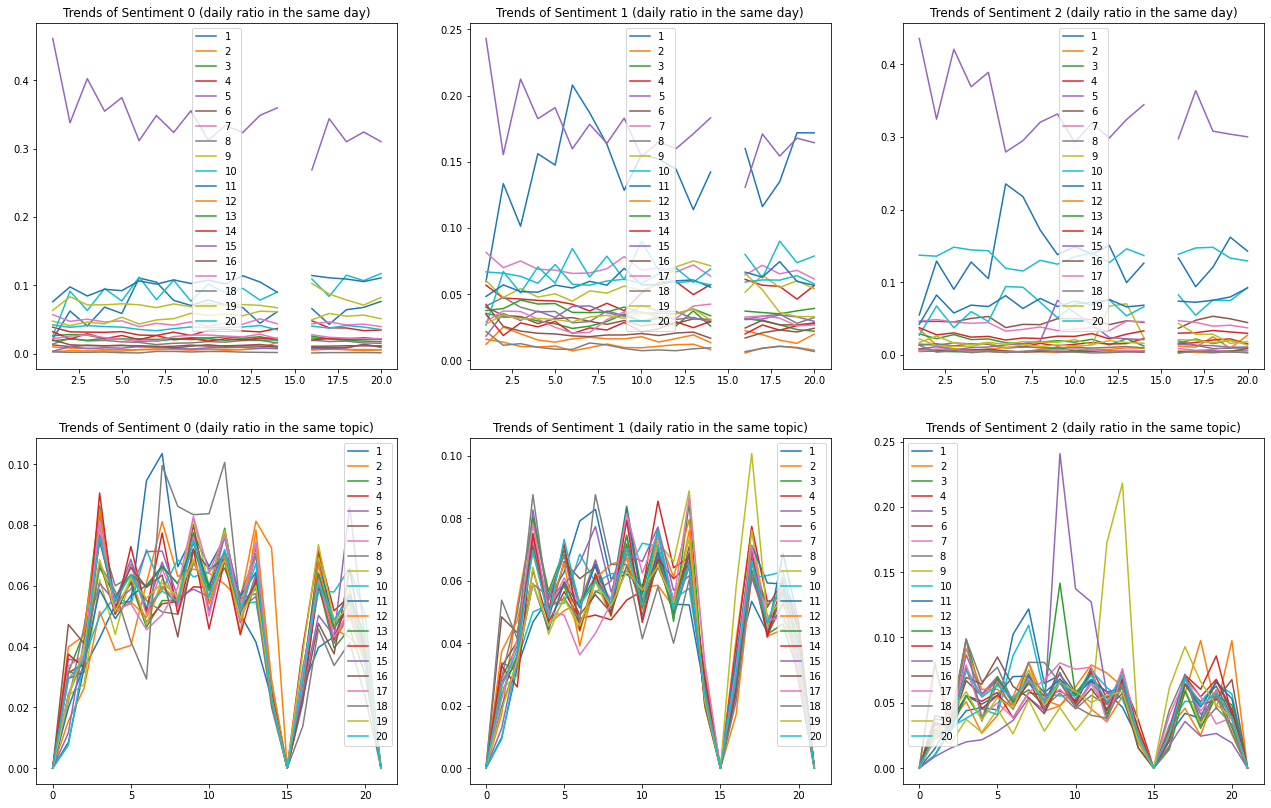

In [89]:
ratioSent(df_topic_sent)

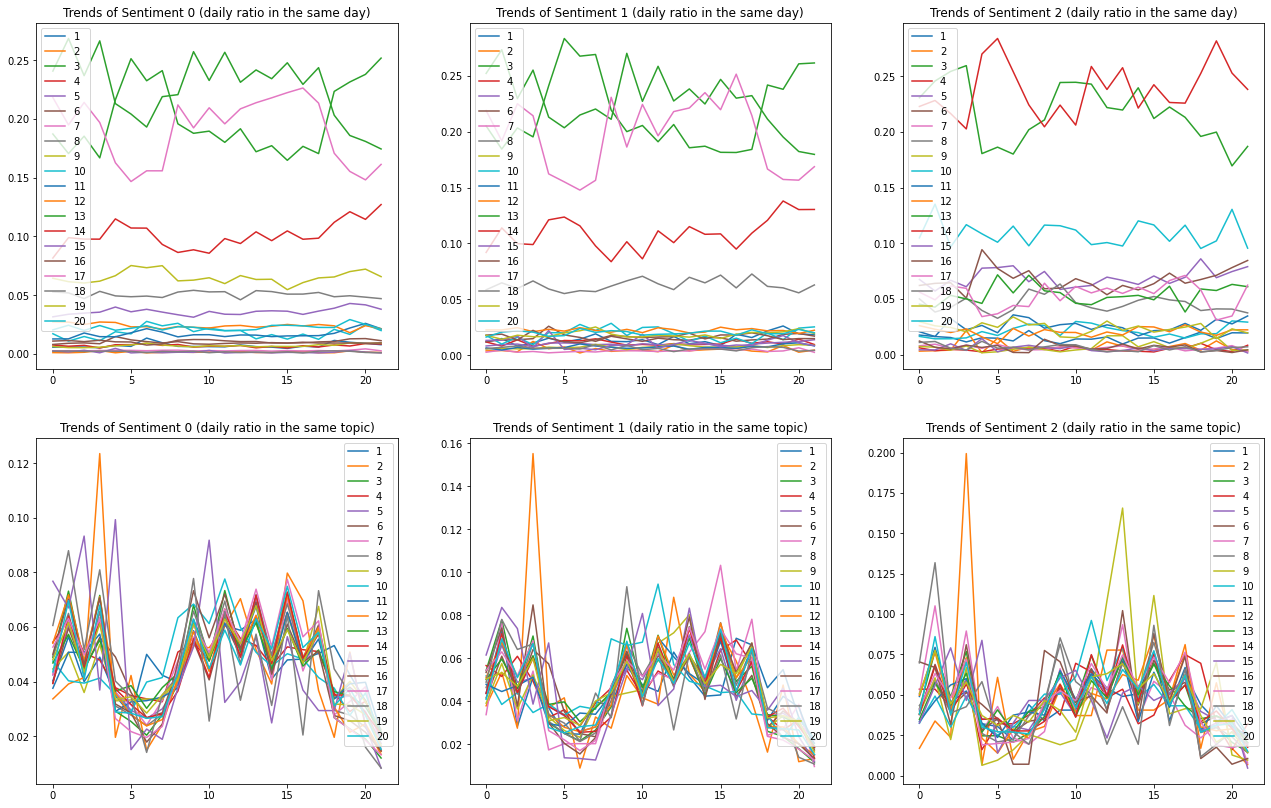

In [90]:
ratioSent(df_topic_sent_news)

In [91]:
def multi_subplot_sentRatio(w=25,h=25,dfs=df_topic_sent,ratio=0,maxy='0.38'):
    plt.figure(1,figsize=(w, h))
    t=1
    for i in range(5):
        for j in range(4):
            plt.subplot2grid((5,4), (i,j))
            for sent in range(3):
                if ratio==0:
                    getRatio(dfs)[ratio][sent].loc[t,:].plot(ylim=(0,maxy))
                else:
                    getRatio(dfs)[ratio][sent].T.loc[t,:].plot(ylim=(0,maxy))
                    plt.xticks(times,times,rotation=0)
            plt.legend(['Neg','Neu','Pos'],loc='best')
            plt.title('Sentiment Ratio of Topic '+ str(t))
            t += 1

In [94]:
def topicDailySent(dfs=df_topic_sent):
    plt.figure(figsize=(25, 7))
    for i in range(3):
        sents = dict(dfs.groupby('TopicID').apply(lambda x: list(x[i])))
        count = pd.DataFrame(sents)
        plt.subplot(int(f'14{i+1}'))
        plt.plot(count)
        plt.xticks(times,times,rotation=0)
        plt.legend(range(1,21),loc='best')
        plt.title(f'Sentiment {i} Count against date of each topcis')
    plt.subplot(144)
    plt.plot(pd.DataFrame(dict(dfs.groupby('TopicID').apply(lambda x: list(x['TopicScore'])))))
#     plt.ylim(-0.85,-0.2)
    plt.xticks(times,times,rotation=0)
    plt.legend(range(1,21),loc='best')
    plt.title('Sentiment Score against date of each topcis')

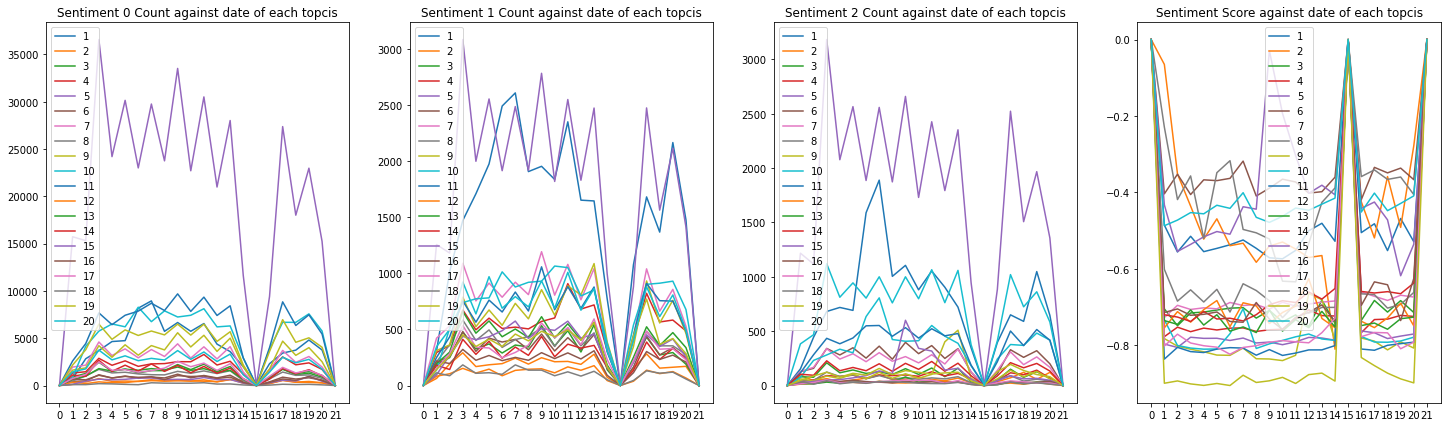

In [95]:
topicDailySent(df_topic_sent)

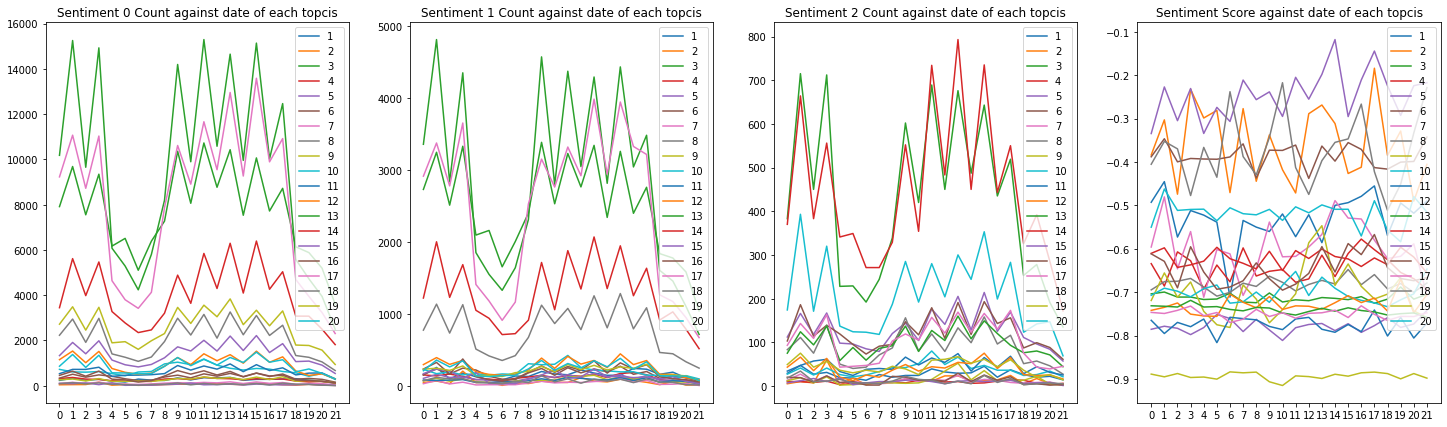

In [96]:
topicDailySent(df_topic_sent_news)

# Sentiment trends against each topic

In [97]:
def multi_subplot_sent(w=15,h=12,dfs=df_topic_sent):
    plt.figure(1,figsize=(w, h))
    t=1
    for i in range(5):
        for j in range(4):
            plt.subplot2grid((5,4), (i,j))
#             plt.subplot(f'54{(t+1)}') #不能超过9个
            for s in range(3):
                pic= pd.Series(dfs.groupby('TopicID').apply(lambda x: list(x[s]))[t]).plot()
#                 pic.set_ylim([0,90000])
            plt.legend(['Neg','Neu','Pos'],loc='best')
            plt.xticks(times,times,rotation=0)
            plt.title('Sentiment Trend of Topic '+ str(t))
            t += 1

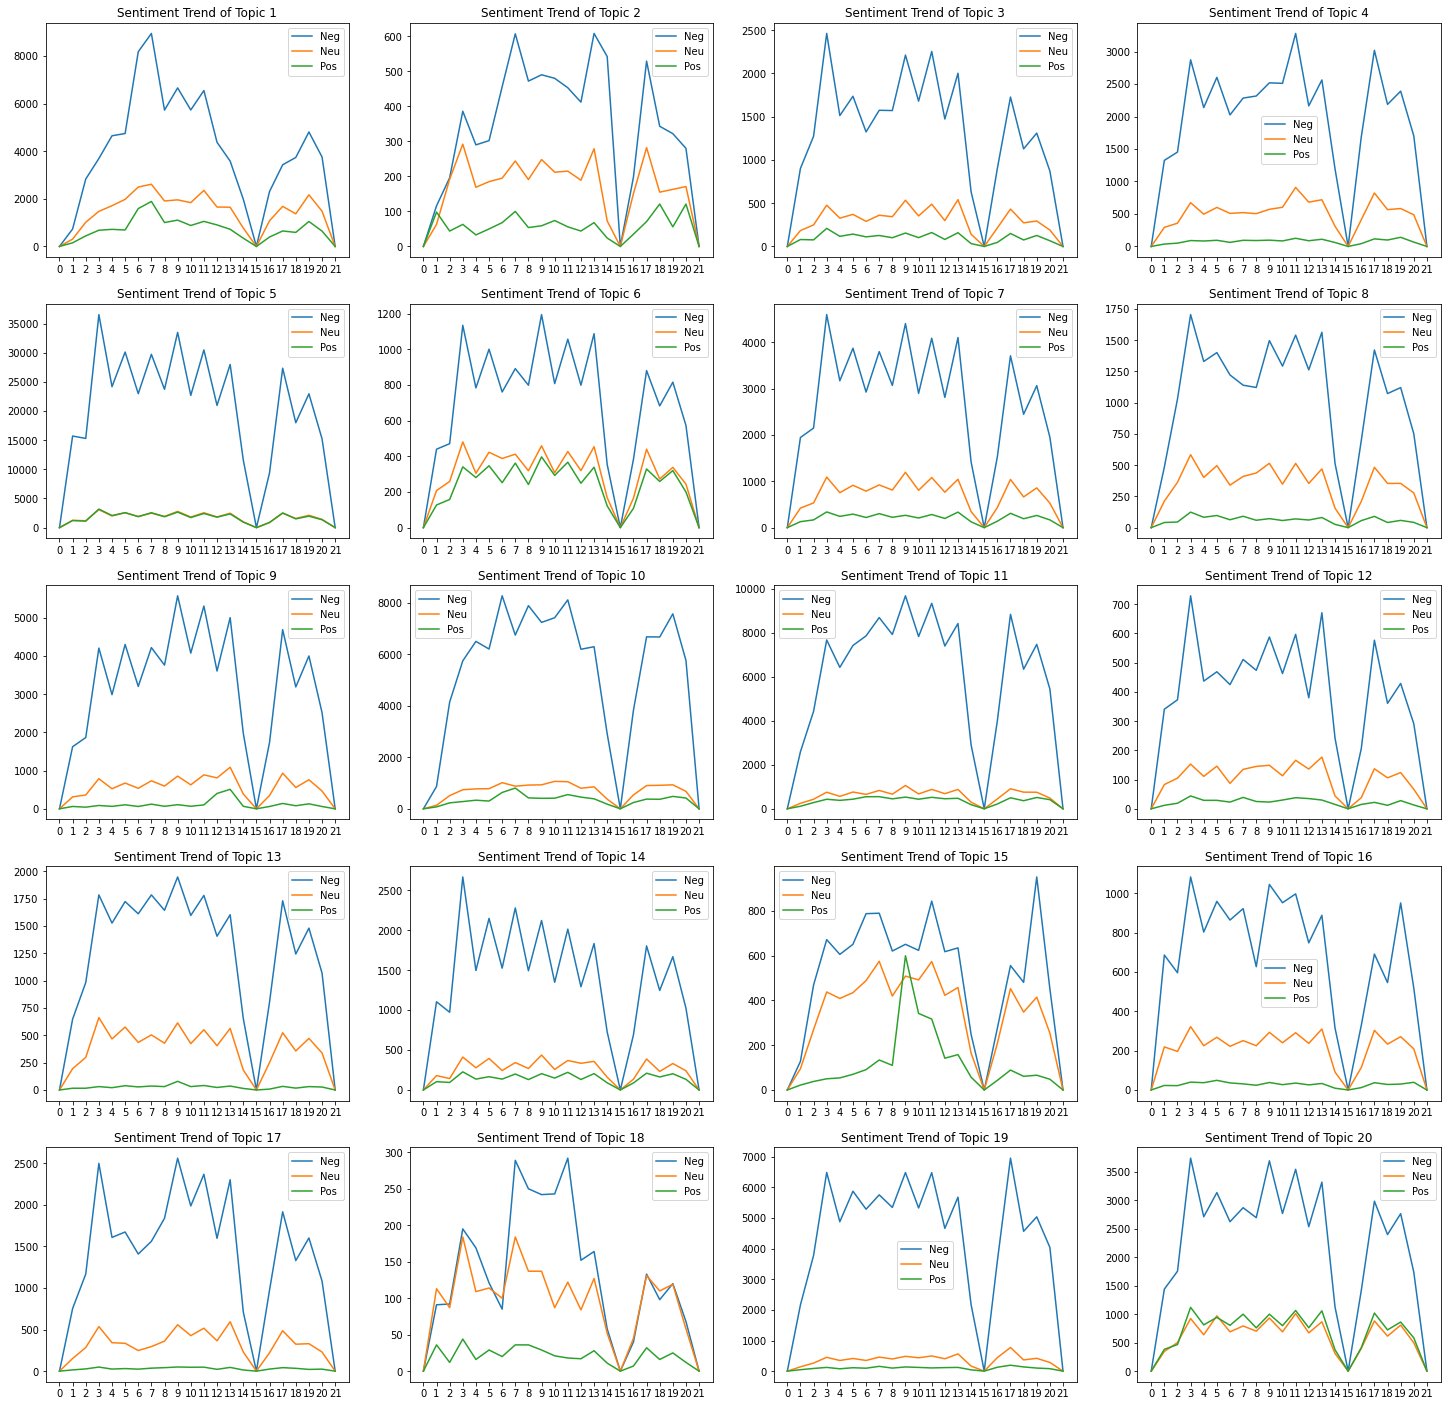

In [98]:
multi_subplot_sent(w=25,h=25,dfs=df_topic_sent)

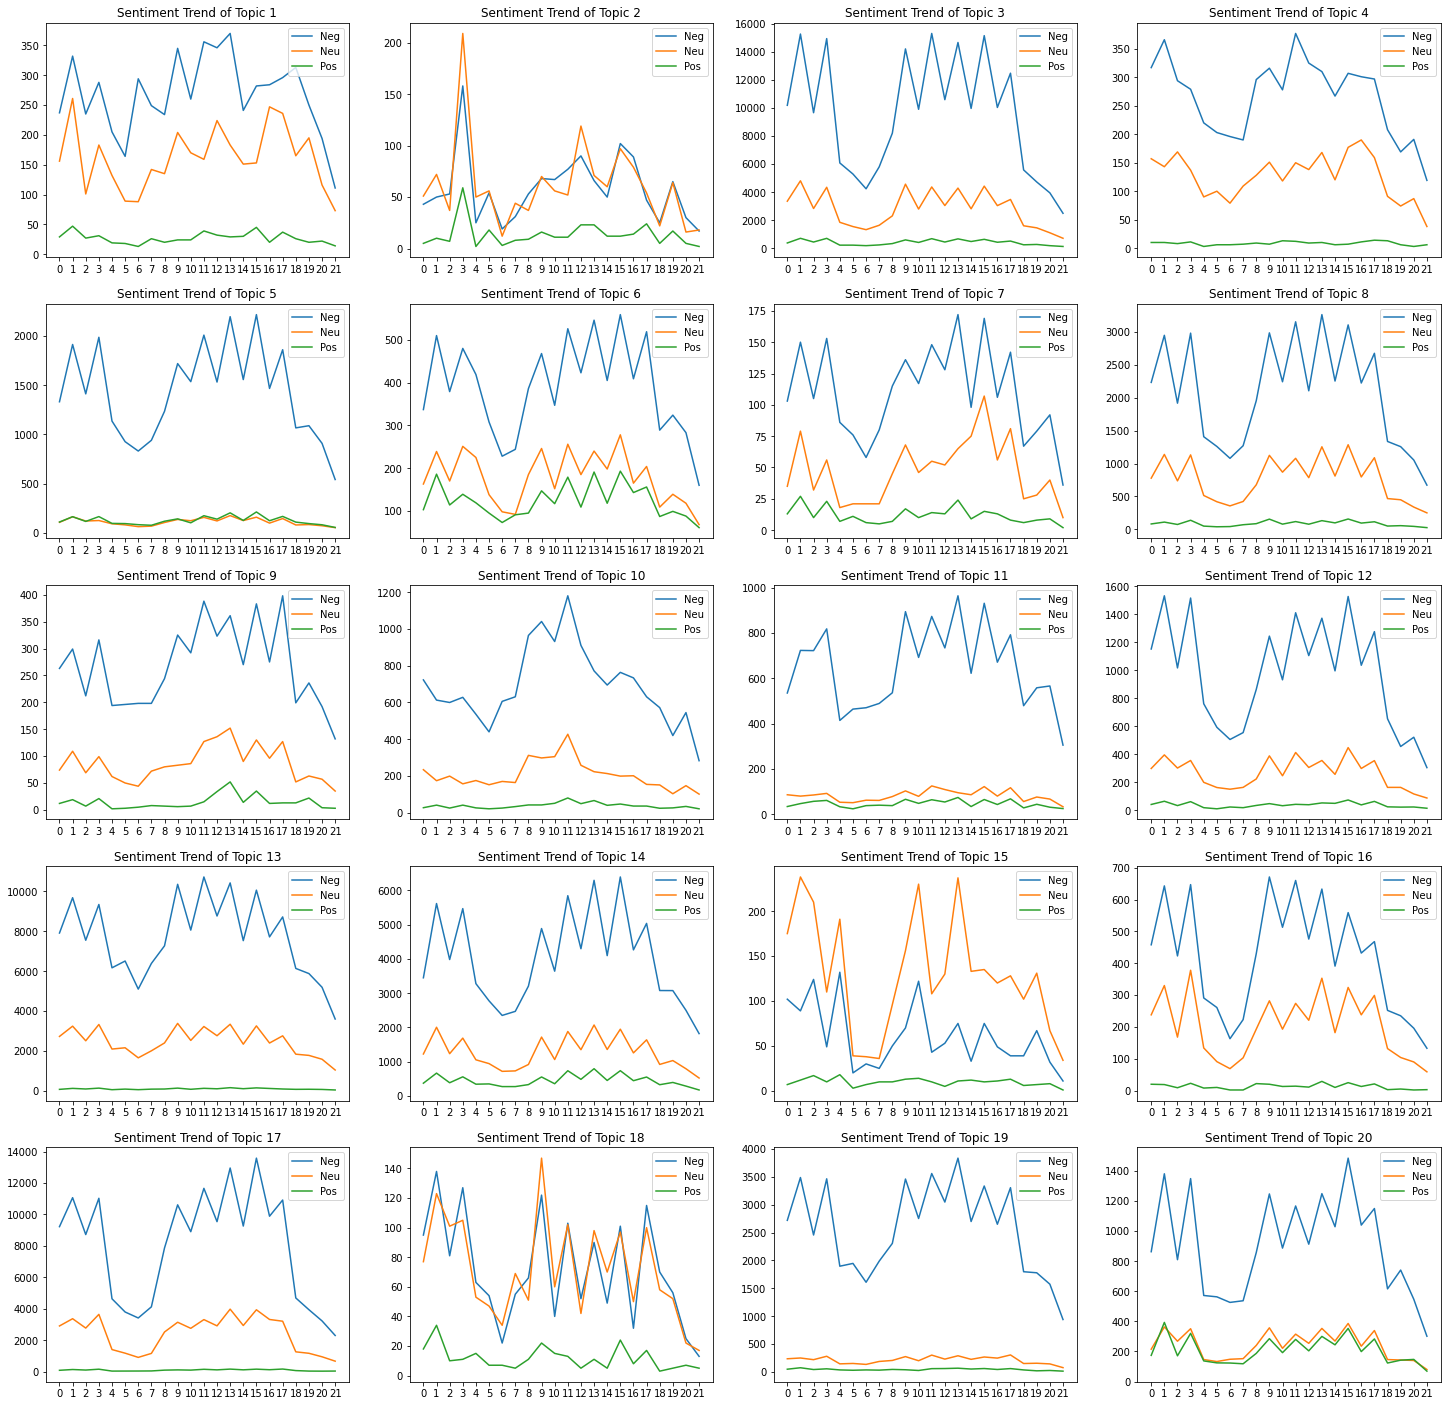

In [99]:
multi_subplot_sent(w=25,h=25,dfs=df_topic_sent_news)

## Relative value: Ratio based on Topics
For each sentiment in each day, all the values of each topics add up to 1

纵坐标上所有点和为1

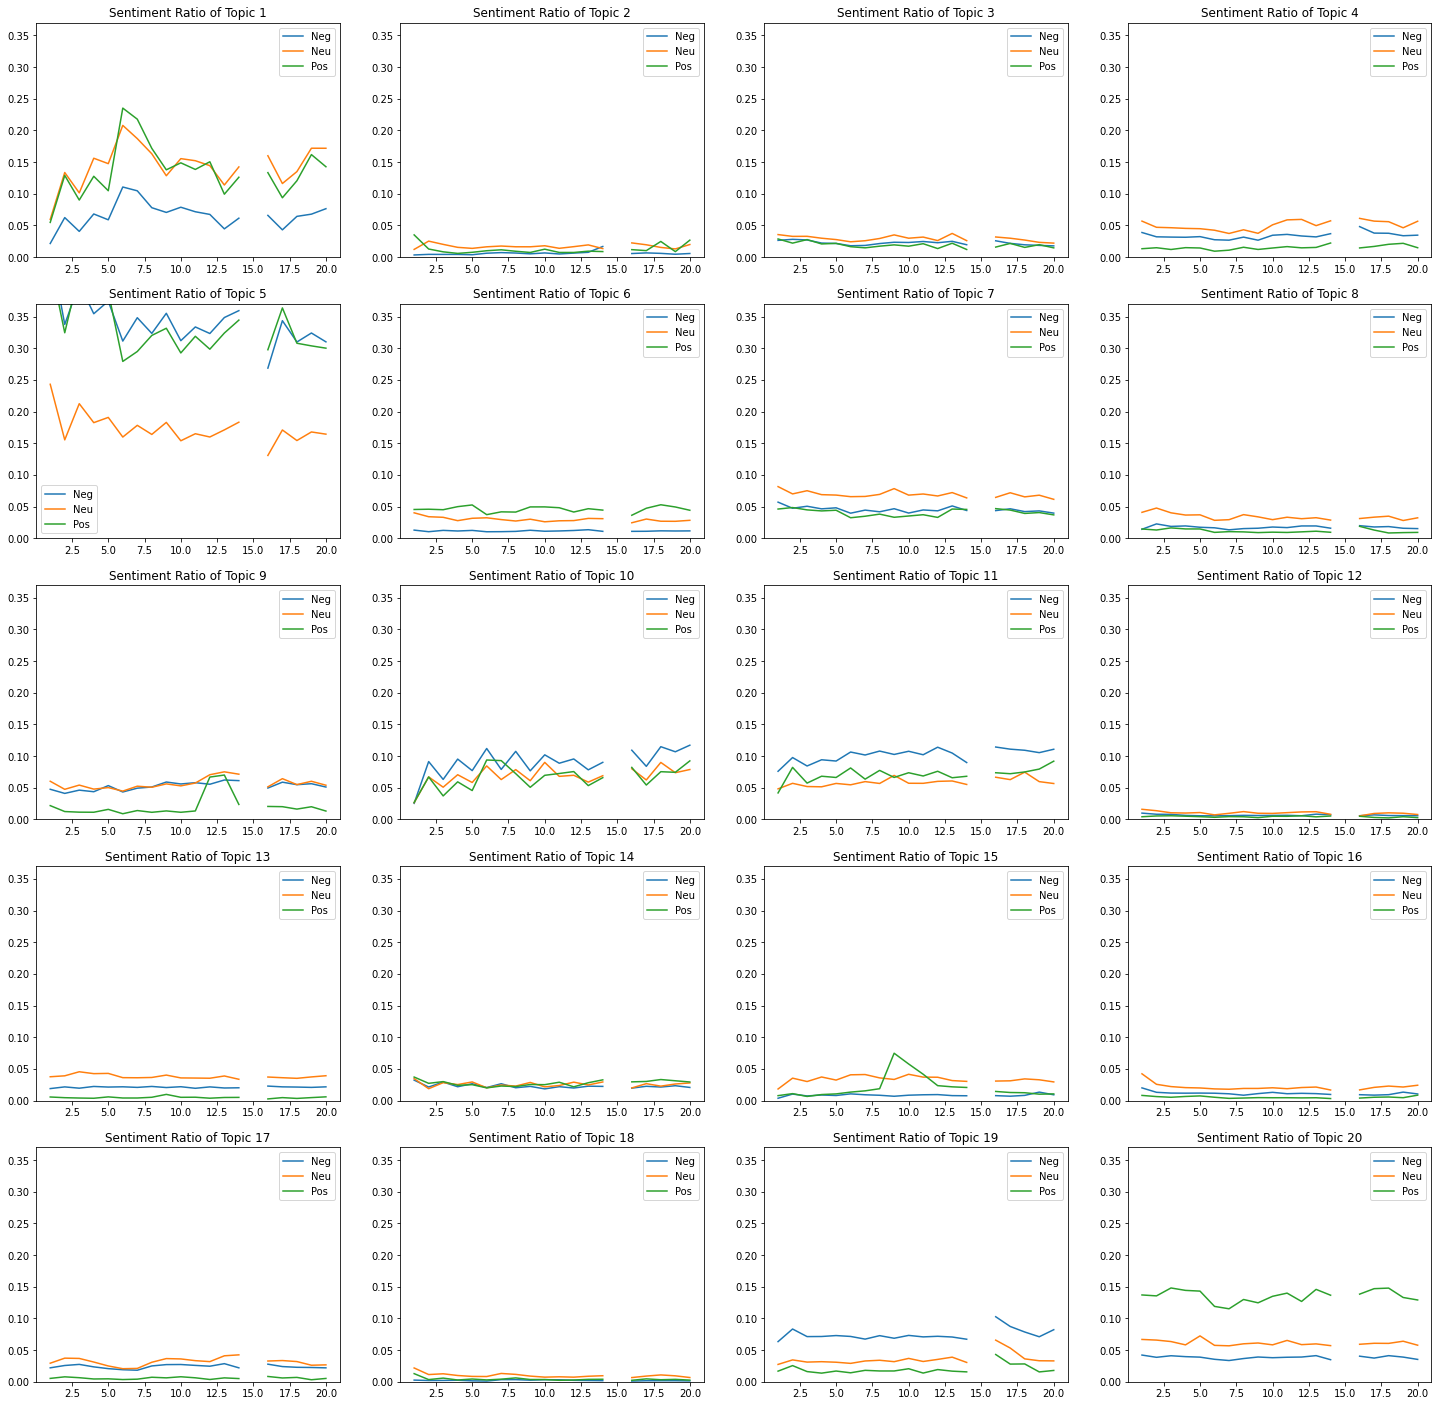

In [101]:
multi_subplot_sentRatio(dfs = df_topic_sent,maxy=0.37)

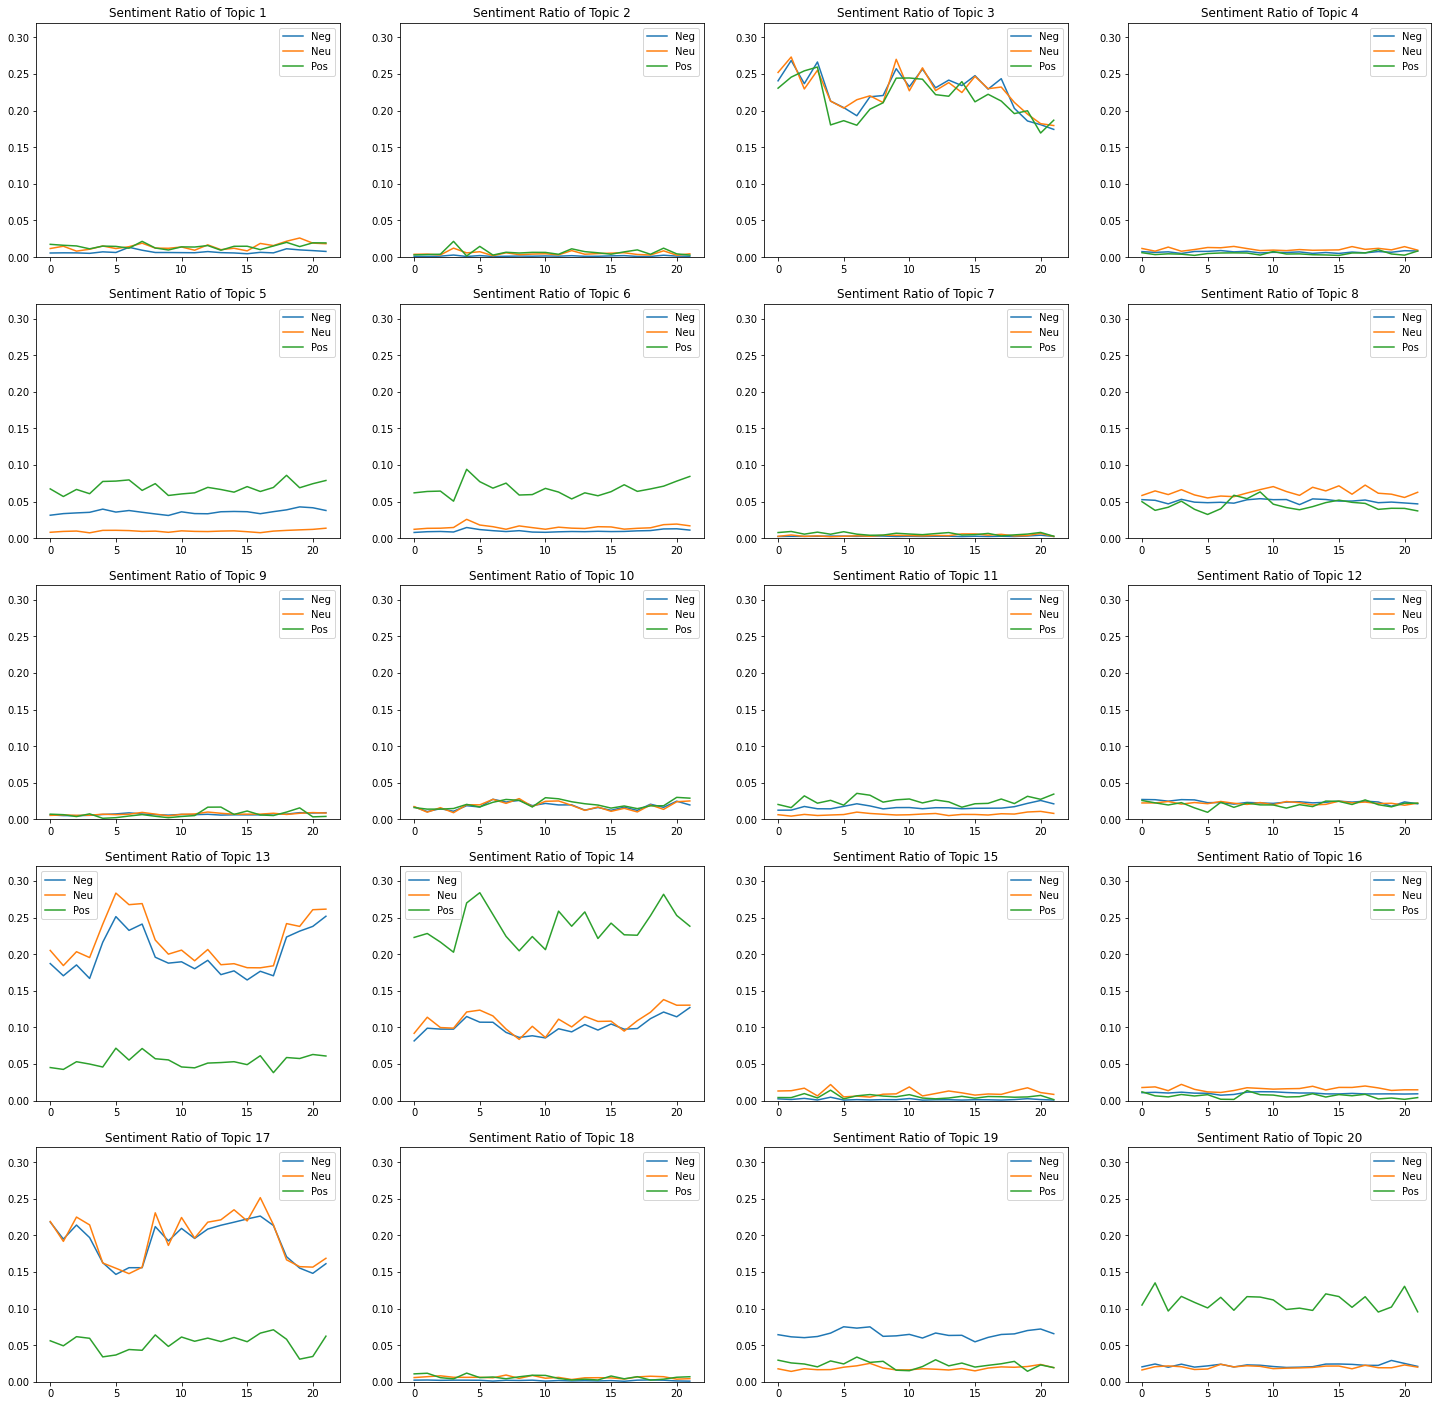

In [102]:
multi_subplot_sentRatio(dfs = df_topic_sent_news, maxy=0.32)

## Relative values: Ratio based on date
For each sentiment in each topic, all the one-week value add up to 1
一条线上所有点和为1

sentiment折线趋近于数量曲线

In [146]:
# multi_subplot_sentRatio(w=25,h=25,dfs=df_topic_sent,ratio=1,maxy=0.12)

In [147]:
# multi_subplot_sentRatio(w=25,h=25,dfs=df_topic_sent_news,ratio=1,maxy=0.35)

## Sentiment Score

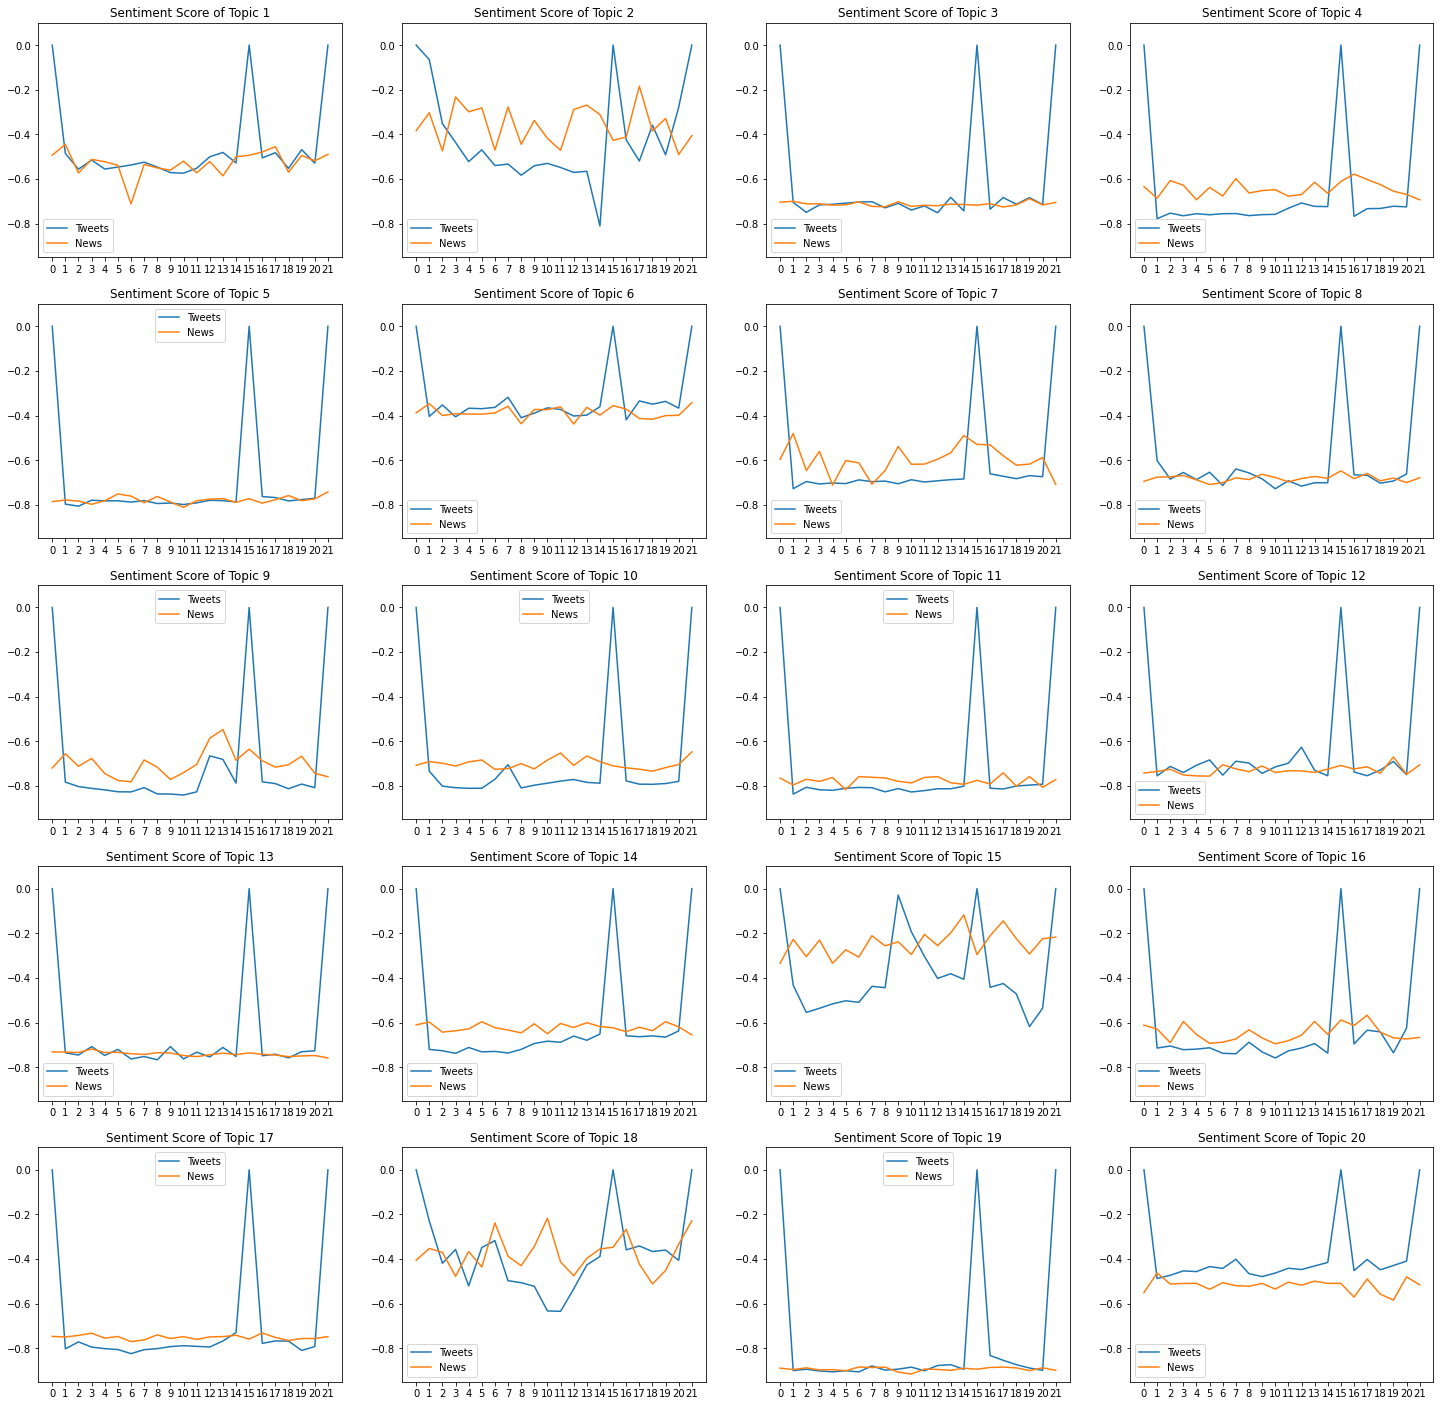

In [8]:
def multi_subplot_sent_score(w=15,h=12):
    plt.figure(1,figsize=(w, h))
    t=1
    for i in range(5):
        for j in range(4):
            plt.subplot2grid((5,4), (i,j))
#             plt.subplot(f'54{(t+1)}') #不能超过9个
            pd.Series(df_topic_sent.groupby('TopicID').apply(lambda x: list(x['TopicScore']))[t]).plot(ylim=(-0.95,0.1))
            pd.Series(df_topic_sent_news.groupby('TopicID').apply(lambda x: list(x['TopicScore']))[t]).plot()
            plt.legend(['Tweets','News'],loc='best')
            plt.xticks(times,times,rotation=0)
#             pic.set_ylim([-0.85,-0.2]) #若适用plt.plot(xx)则不能适用该属性
            plt.title('Sentiment Score of Topic '+ str(t))
            t += 1
multi_subplot_sent_score(w=25,h=25)

# 10% news & 60% tweets